In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn

In [2]:
# Read MNIST dataset
train = pandas.read_csv("mnist_train.csv", header = None)
test = pandas.read_csv("mnist_test.csv", header = None)
print(train.shape, test.shape)

(60000, 785) (10000, 785)


In [3]:
# Sparate features and labels
x_train = train.iloc[:,1:] / 255
y_train = train.iloc[:,0]
x_test = test.iloc[:,1:] / 255
y_test = test.iloc[:,0]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [4]:
# Train logistic regression (class probabilities)
log_mult = sklearn.linear_model.LogisticRegression(multi_class = "multinomial")
log_mult.fit(x_train, y_train)
y_pred = log_mult.predict(x_test)
[list(y_pred[0:25]), list(y_test[0:25])]

C:\Users\young\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4],
 [7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4]]

<Axes: >

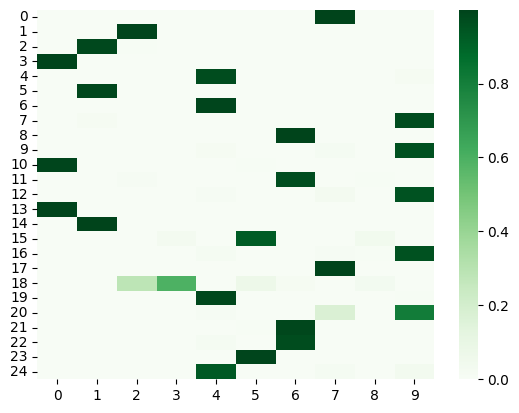

In [5]:
# Compute the probability predictions
y_prob = log_mult.predict_proba(x_test)
seaborn.heatmap(y_prob[0:25,:], cmap = "Greens")

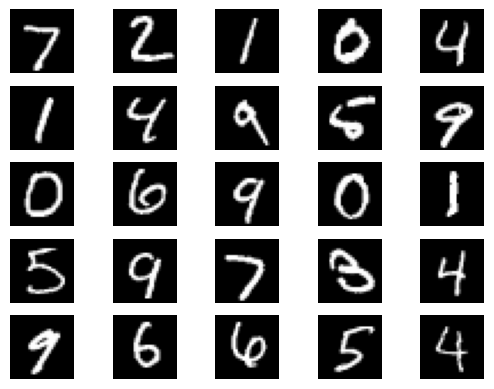

In [6]:
# Plot some images
fig, axs = plt.subplots(5, 5)
row = 0
for ax in axs.flat:
    ax.imshow(numpy.reshape(x_test.iloc[row], (28, 28)), cmap = "gray")
    ax.set_axis_off()
    row = row + 1

In [7]:
# Compute the predictions again by finding the largest element of each row
numpy.reshape(y_prob.argmax(axis = 1)[:25], (5, 5))

array([[7, 2, 1, 0, 4],
       [1, 4, 9, 6, 9],
       [0, 6, 9, 0, 1],
       [5, 9, 7, 3, 4],
       [9, 6, 6, 5, 4]], dtype=int64)

In [8]:
# Compute the confidence of the predictions 
numpy.reshape(y_prob.max(axis = 1)[:25], (5, 5))

array([[0.99797796, 0.9945861 , 0.98750686, 0.99991078, 0.97613744],
       [0.99134751, 0.99273978, 0.97550762, 0.9988386 , 0.95934433],
       [0.99251649, 0.97205224, 0.95422144, 0.99847231, 0.99754709],
       [0.92376157, 0.96063084, 0.99658148, 0.59654548, 0.98979716],
       [0.81081344, 0.99092651, 0.97462522, 0.99233861, 0.93726248]])

<Axes: >

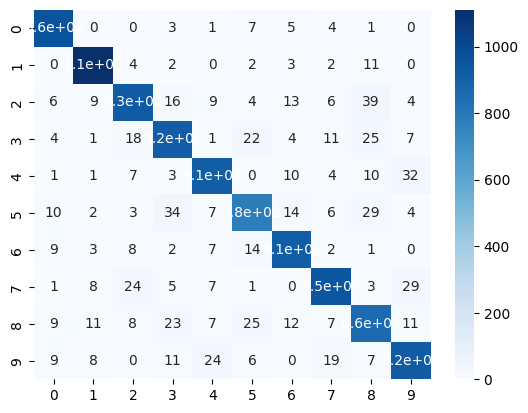

In [9]:
# Compute and plot the confusion matrix
mat = sklearn.metrics.confusion_matrix(y_test, y_pred)
seaborn.heatmap(mat, cmap = "Blues", annot = True)

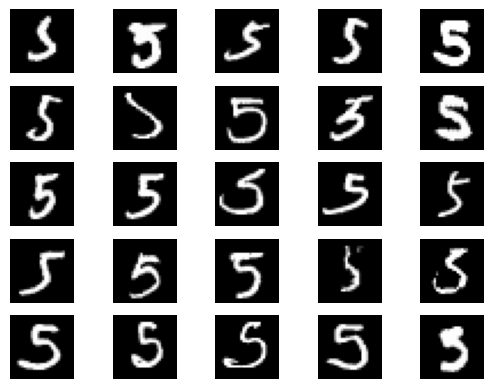

In [10]:
# Plot some images that are predicted incorrectly
fig, axs = plt.subplots(5, 5)
row = 0
conf = []
for ax in axs.flat:
    while y_test[row] != 5 or y_pred[row] != 3:
        row = row + 1
    conf.append(max(y_prob[row]))
    ax.imshow(numpy.reshape(x_test.iloc[row], (28, 28)), cmap = "gray")
    ax.set_axis_off()
    row = row + 1

In [11]:
# Print the confidence of each (incorrect) prediction
numpy.reshape(conf, (5, 5))

array([[0.94538205, 0.65840662, 0.61810416, 0.69011816, 0.6871216 ],
       [0.77393308, 0.61260013, 0.46116689, 0.78637264, 0.60518662],
       [0.46655975, 0.89960316, 0.84515438, 0.95208834, 0.56836712],
       [0.39720656, 0.70514769, 0.61022429, 0.42362868, 0.6436321 ],
       [0.51276961, 0.47416927, 0.93695067, 0.81826456, 0.54473003]])